# STEP 1  Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import calendar

#  STEP 2 Importing the dataset

In [2]:
dataset = pd.read_csv('day.csv')
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## STEP 3 Understanding the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## STEP 4 Data Preparation and Performing the EDA

Removing the 'casual' and 'registered' as they are not the features 

In [6]:
dataset.pop('casual')
dataset.pop('registered')
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


Converting the categorical variables 

In [8]:
def convert_season(x):
    dic = {1:'spring',2:'summer',3:'fall',4:'winter'}
    if x in dic:
        x= dic[x]
    return x

dataset['season'] = dataset['season'].apply(lambda x: convert_season(x))
dataset['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
def convert_mnth(x):
    m  = calendar.month_abbr[x]
    return m
dataset['mnth'] = dataset['mnth'].apply(lambda x: convert_mnth(x))

In [10]:
def convert_weekday(x):
    days = {0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}
    if x in days:
        x= days[x]
    return x
dataset['weekday'] = dataset['weekday'].apply(lambda x: convert_weekday(x))
dataset['weekday'].value_counts()

saturday     105
sunday       105
monday       105
tuesday      104
thursday     104
friday       104
wednesday    103
Name: weekday, dtype: int64

In [11]:
def convert_weathersit(x):
    sit = {1: 'clear', 2:'mist', 3:'light rain', 4:'heavy rain'}
    if x in sit:
        x= sit[x]
    return x
    
dataset['weathersit'] = dataset['weathersit'].apply(lambda x: convert_weathersit(x))
dataset['weathersit'].value_counts()

clear         463
mist          246
light rain     21
Name: weathersit, dtype: int64

In [12]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,Jan,0,saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,Jan,0,sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,Jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,Jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,Jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## STEP 5 Performing the Univariate Analysis

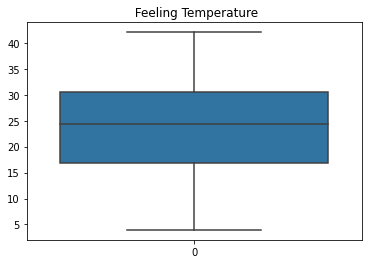

In [13]:
sns.boxplot(dataset['atemp'])
plt.title(' Feeling Temperature')
plt.show()


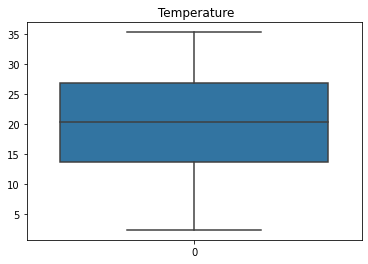

In [14]:
sns.boxplot(dataset['temp'])
plt.title(' Temperature')
plt.show()


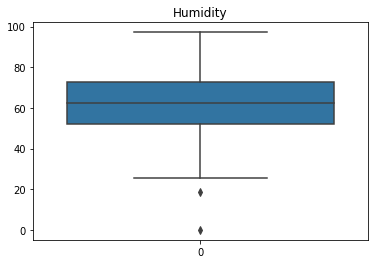

In [15]:
sns.boxplot(dataset['hum'])
plt.title('Humidity')
plt.show()


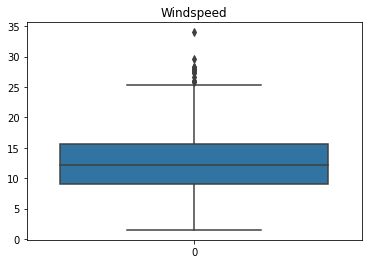

In [16]:
sns.boxplot(dataset['windspeed'])
plt.title('Windspeed')
plt.show()


Visualising the Cateogrical Variables in respect to the target variables

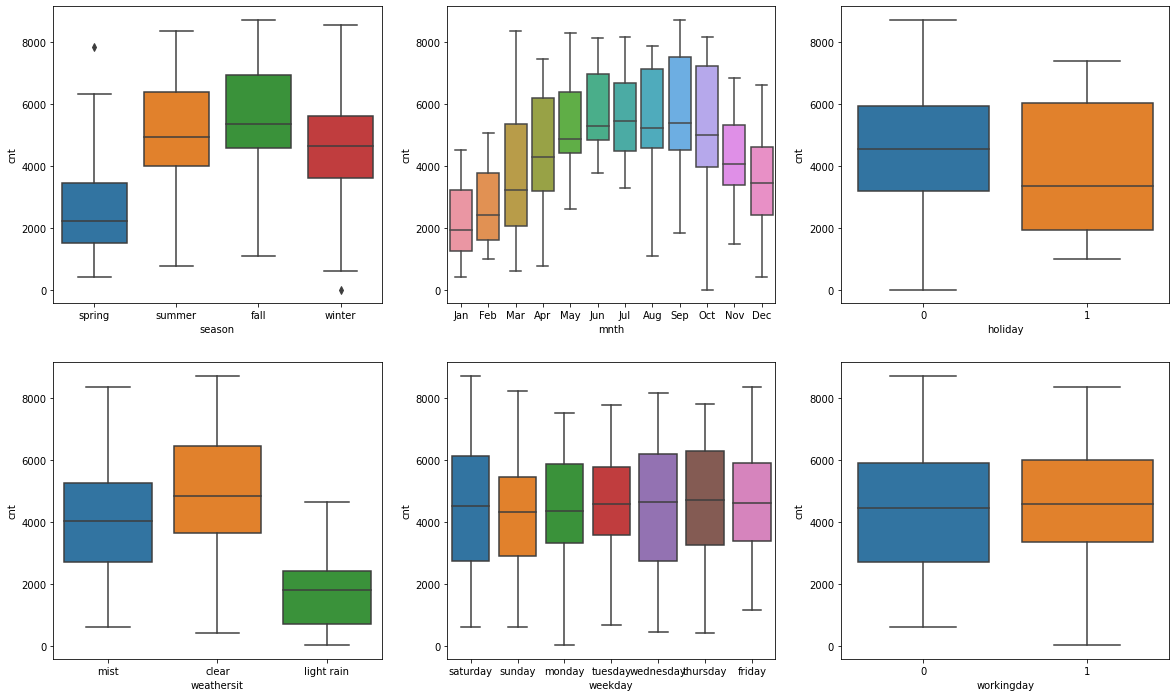

In [17]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x ='season', y='cnt'  ,data = dataset)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y= 'cnt' , data = dataset)
plt.subplot(2,3,3)
sns.boxplot(x='holiday', y= 'cnt', data= dataset)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y= 'cnt',  data = dataset)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y= 'cnt' , data = dataset)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday',y = 'cnt', data=dataset)

plt.show()

Visualising the Numerical variables in Pairplot in respect to the target variable

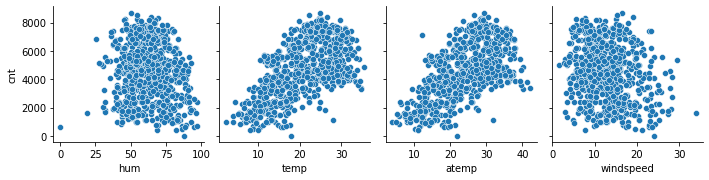

In [18]:
sns.pairplot(x_vars= ('hum','temp','atemp','windspeed'),y_vars = ['cnt'] , data=dataset)

Heatmap to understand the correlation between the variables

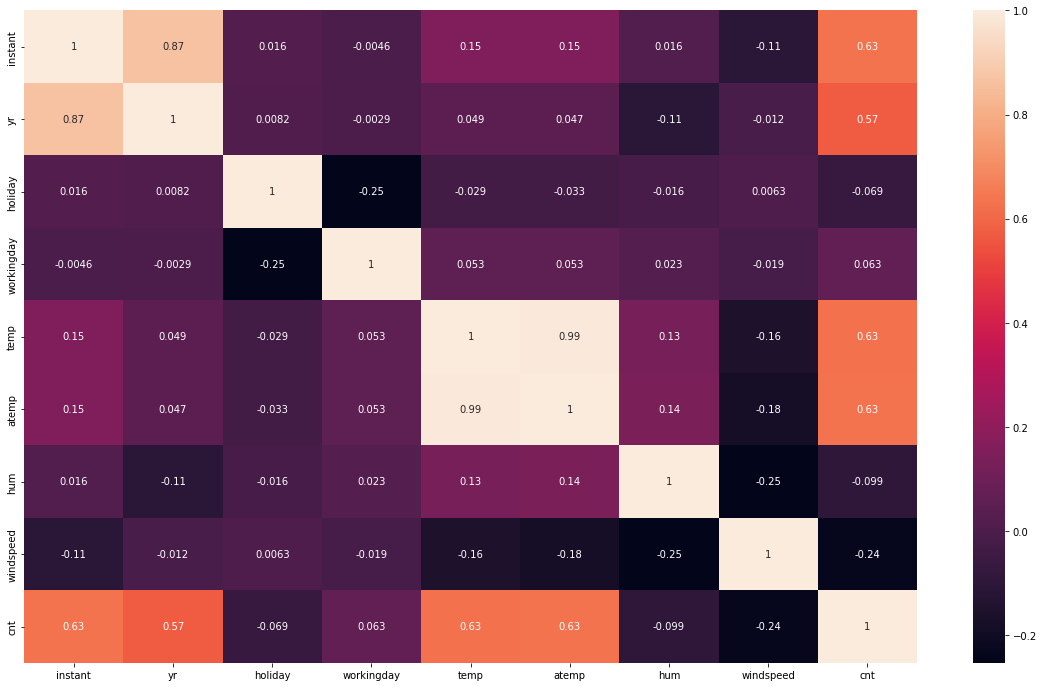

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(),annot= True)
plt.show()

# STEP 6 Creating the Dummy Variables 

In [20]:
# Creating the dummy variables for the season column 
season = pd.get_dummies(dataset['season'], drop_first = True)

In [21]:
dataset = pd.concat([dataset, season], axis = 1)

In [22]:
# Creating the dummy variables for the month column 
month = pd.get_dummies(dataset['mnth'], drop_first=True)
dataset = pd.concat([dataset,month], axis=1)

In [23]:
# Creating the dummy variables for the weekday column 
weekdays = pd.get_dummies(dataset['weekday'], drop_first= True)
dataset = pd.concat([dataset,weekdays], axis=1)

In [24]:
# Creating the dummy variables for the weathersit column 
weather_sit = pd.get_dummies(dataset['weathersit'], drop_first = True)
dataset = pd.concat([dataset,weather_sit], axis=1)

In [25]:
dataset = dataset.drop(['season','mnth','weekday','weathersit','instant','dteday'], axis=1)

# STEP 7 TRAIN AND TEST SPLIT AND RE-SCALING 

In [26]:
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

Re-scaling the variables to make it easy for the model to have good stability 

In [27]:
scaler = MinMaxScaler()
df_train_t = df_train
col = df_train.columns
df_train_t[col] = scaler.fit_transform(df_train[col])
df_train_t.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,light rain,mist
653,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# STEP 8 Performing the modelling using RFE method 

Dividing the training data into X and Y training 

In [28]:
y_train = df_train_t.pop('cnt')

In [29]:
X_train  = df_train_t
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,light rain,mist
653,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# We will be using the RFE feature and then use the Statistical Model for training purposes

RFE

In [30]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', False, 5),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 2),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('monday', True, 1),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', True, 1),
 ('tuesday', True, 1),
 ('wednesday', True, 1),
 ('light rain', True, 1),
 ('mist', True, 1)]

In [33]:
col2 = X_train.columns[rfe.support_]
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Jul', 'Jun', 'Nov', 'Oct',
       'Sep', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'light rain', 'mist'],
      dtype='object')

We will check the columns which RFE rejected

In [34]:
X_train.columns[~rfe.support_]

Index(['Feb', 'Jan', 'Mar', 'May'], dtype='object')

## Building the model using statsmodels and getting the proper statistical data 

In [35]:
X_train_rfe1 = X_train[col2]

In [36]:
X_train_rfe = sm.add_constant(X_train_rfe1)

In [37]:
lr_1 = sm.OLS(y_train,X_train_rfe).fit()

In [38]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.70e-183
Time:                        18:14:36   Log-Likelihood:                 523.30
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     485   BIC:                            -890.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2160      0.032      6.846      0.000       0.154       0.278
yr             0.2300      0.008     28.550      0.000       0.214       0.246
holiday       -0.0015      0.024     -0.063      0.950      -0.048       0.045
workingday     0.0911      0.012      7.783      0.000       0.068       0.114
temp           0.4824      0.139      3.478      0.001       0.210       0.755
atemp          0.0376      0.138      0.272      0.786      -0.234       0.309
hum           -0.1628      0.038     -4.263      0.000      -0.238      -0.088
windspeed     -0.1817      0.026     -6.950      0.000      -0.233      -0.130
spring        -0.0616      0.028     -2.202      0.028      -0.117      -0.007
summer         0.0525      0.025      2.072      0.039       0.003       0.102
winter         0.0988      0.027      3.604      0.000       0.045       0.153
Aug            0.0031      0.031      0.101      0.919      -0.057       0.063
Dec           -0.0176      0.023     -0.757      0.450      -0.063       0.028
Jul           -0.0566      0.032     -1.778      0.076      -0.119       0.006
Jun           -0.0225      0.021     -1.066      0.287      -0.064       0.019
Nov           -0.0198      0.029     -0.679      0.498      -0.077       0.038
Oct            0.0208      0.029      0.707      0.480      -0.037       0.079
Sep            0.0785      0.028      2.805      0.005       0.024       0.134
monday        -0.0215      0.015     -1.391      0.165      -0.052       0.009
saturday       0.0903      0.013      6.820      0.000       0.064       0.116
sunday         0.0361      0.014      2.658      0.008       0.009       0.063
thursday      -0.0099      0.016     -0.632      0.528      -0.041       0.021
tuesday       -0.0192      0.016     -1.226      0.221      -0.050       0.012
wednesday     -0.0058      0.015     -0.389      0.697      -0.035       0.024
light rain    -0.2526      0.026     -9.550      0.000      -0.305      -0.201
mist          -0.0599      0.010     -5.711      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       75.664   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.217
Skew:                          -0.746   Prob(JB):                     4.07e-43
Kurtosis:                       5.638   Cond. No.                     1.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Removing the holiday column because of high p-value

In [39]:
X_train_rfe1.head()
X_train_rfe1.pop('holiday')
X_train_rfe1.head()

,yr,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,light rain,mist
653,1.0,1.0,0.509887,0.501133,0.575354,0.300794,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
576,1.0,1.0,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
426,1.0,0.0,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.245101,0.200348,0.498067,0.663106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.395666,0.391735,0.504508,0.188475,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
X_train_1 = sm.add_constant(X_train_rfe1)
lr_2 = sm.OLS(y_train,X_train_1).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.70e-183
Time:                        18:14:36   Log-Likelihood:                 523.30
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     485   BIC:                            -890.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2146      0.048      4.481      0.000       0.120       0.309
yr             0.2300      0.008     28.550      0.000       0.214       0.246
workingday     0.0926      0.027      3.473      0.001       0.040       0.145
temp           0.4824      0.139      3.478      0.001       0.210       0.755
atemp          0.0376      0.138      0.272      0.786      -0.234       0.309
hum           -0.1628      0.038     -4.263      0.000      -0.238      -0.088
windspeed     -0.1817      0.026     -6.950      0.000      -0.233      -0.130
spring        -0.0616      0.028     -2.202      0.028      -0.117      -0.007
summer         0.0525      0.025      2.072      0.039       0.003       0.102
winter         0.0988      0.027      3.604      0.000       0.045       0.153
Aug            0.0031      0.031      0.101      0.919      -0.057       0.063
Dec           -0.0176      0.023     -0.757      0.450      -0.063       0.028
Jul           -0.0566      0.032     -1.778      0.076      -0.119       0.006
Jun           -0.0225      0.021     -1.066      0.287      -0.064       0.019
Nov           -0.0198      0.029     -0.679      0.498      -0.077       0.038
Oct            0.0208      0.029      0.707      0.480      -0.037       0.079
Sep            0.0785      0.028      2.805      0.005       0.024       0.134
monday        -0.0215      0.015     -1.391      0.165      -0.052       0.009
saturday       0.0918      0.030      3.031      0.003       0.032       0.151
sunday         0.0376      0.030      1.237      0.217      -0.022       0.097
thursday      -0.0099      0.016     -0.632      0.528      -0.041       0.021
tuesday       -0.0192      0.016     -1.226      0.221      -0.050       0.012
wednesday     -0.0058      0.015     -0.389      0.697      -0.035       0.024
light rain    -0.2526      0.026     -9.550      0.000      -0.305      -0.201
mist          -0.0599      0.010     -5.711      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       75.664   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.217
Skew:                          -0.746   Prob(JB):                     4.07e-43
Kurtosis:                       5.638   Cond. No.                         90.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see that there are many insignificant columns  so we will decrease the number of columns and check again

# Running the RFE model again to get the top 15 features

In [41]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train_rfe1, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train_rfe1, y_train)

In [42]:
list(zip(X_train_rfe1.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 2),
 ('Nov', False, 3),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('monday', False, 6),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 8),
 ('tuesday', False, 7),
 ('wednesday', False, 9),
 ('light rain', True, 1),
 ('mist', True, 1)]

In [43]:
col4 = X_train_rfe1.columns[rfe.support_]
col4

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jul', 'Oct', 'Sep', 'saturday', 'sunday', 'light rain',
       'mist'],
      dtype='object')

In [44]:
X_train_rfe1.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Jun', 'Nov', 'monday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

In [45]:
X_train_rfe3 = X_train_rfe1[col4]

In [46]:
X_train_rfe_2 = sm.add_constant(X_train_rfe3)
lr_5  = sm.OLS(y_train, X_train_rfe_2).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.29e-191
Time:                        18:14:37   Log-Likelihood:                 520.48
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1955      0.042      4.603      0.000       0.112       0.279
yr             0.2302      0.008     28.830      0.000       0.215       0.246
workingday     0.1013      0.025      4.008      0.000       0.052       0.151
temp           0.5105      0.034     15.040      0.000       0.444       0.577
hum           -0.1615      0.037     -4.338      0.000      -0.235      -0.088
windspeed     -0.1830      0.025     -7.228      0.000      -0.233      -0.133
spring        -0.0622      0.021     -3.004      0.003      -0.103      -0.022
summer         0.0509      0.015      3.450      0.001       0.022       0.080
winter         0.0826      0.019      4.424      0.000       0.046       0.119
Jul           -0.0520      0.018     -2.882      0.004      -0.087      -0.017
Oct            0.0390      0.017      2.258      0.024       0.005       0.073
Sep            0.0859      0.017      5.196      0.000       0.053       0.118
saturday       0.1112      0.027      4.164      0.000       0.059       0.164
sunday         0.0569      0.027      2.119      0.035       0.004       0.110
light rain    -0.2526      0.026     -9.674      0.000      -0.304      -0.201
mist          -0.0583      0.010     -5.627      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       76.176   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.360
Skew:                          -0.742   Prob(JB):                     1.14e-44
Kurtosis:                       5.706   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.23
2,temp,19.55
1,workingday,18.55
11,saturday,4.94
4,windspeed,4.90
5,spring,4.82
12,sunday,4.78
7,winter,4.39
6,summer,3.03
14,mist,2.31


Running the RFE again for top 10 features 

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_rfe3, y_train)

rfe = RFE(lm, n_features_to_select = 10)             # running RFE
rfe = rfe.fit(X_train_rfe3, y_train)

In [49]:
list(zip(X_train_rfe3.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('Jul', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('saturday', True, 1),
 ('sunday', False, 3),
 ('light rain', True, 1),
 ('mist', True, 1)]

In [50]:
col4 = X_train_rfe3.columns[rfe.support_]
print(col4)

X_train_rfe3.columns[~rfe.support_]

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'Jul', 'Sep', 'saturday',
       'light rain', 'mist'],
      dtype='object')


Index(['workingday', 'summer', 'winter', 'Oct', 'sunday'], dtype='object')

In [51]:
X_train_rfe4 = X_train[col4]

In [52]:
X_train_rfe_5 = sm.add_constant(X_train_rfe4)
lr_6  = sm.OLS(y_train, X_train_rfe_5).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.33e-184
Time:                        18:14:37   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     499   BIC:                            -908.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3766      0.030     12.421      0.000       0.317       0.436
yr             0.2332      0.008     27.653      0.000       0.217       0.250
temp           0.4091      0.027     15.413      0.000       0.357       0.461
hum           -0.1247      0.038     -3.244      0.001      -0.200      -0.049
windspeed     -0.1802      0.026     -6.805      0.000      -0.232      -0.128
spring        -0.1483      0.012    -11.944      0.000      -0.173      -0.124
Jul           -0.0794      0.018     -4.464      0.000      -0.114      -0.044
Sep            0.0553      0.016      3.445      0.001       0.024       0.087
saturday       0.0212      0.012      1.842      0.066      -0.001       0.044
light rain    -0.2402      0.027     -8.778      0.000      -0.294      -0.186
mist          -0.0607      0.011     -5.610      0.000      -0.082      -0.039
==============================================================================
Omnibus:                       59.213   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.976
Skew:                          -0.640   Prob(JB):                     5.97e-29
Kurtosis:                       5.116   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.91
1,temp,11.88
3,windspeed,3.98
9,mist,2.10
0,yr,2.03
4,spring,1.84
5,Jul,1.40
6,Sep,1.20
8,light rain,1.20
7,saturday,1.18


Removing the 'hum' column because of high VIF value

In [54]:
X_train_rfe4.pop('hum')
X_train_rfe4.head()

,yr,temp,windspeed,spring,Jul,Sep,saturday,light rain,mist
653,1.0,0.509887,0.300794,0.0,0.0,0.0,0.0,0.0,0.0
576,1.0,0.815169,0.264686,0.0,1.0,0.0,0.0,0.0,0.0
426,1.0,0.442393,0.255342,1.0,0.0,0.0,1.0,0.0,1.0
728,1.0,0.245101,0.663106,1.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.395666,0.188475,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
X_train_rfe_6 = sm.add_constant(X_train_rfe4)
lr_7  = sm.OLS(y_train, X_train_rfe_6).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.65e-183
Time:                        18:14:37   Log-Likelihood:                 483.30
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     500   BIC:                            -904.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2999      0.019     15.650      0.000       0.262       0.338
yr             0.2361      0.008     27.869      0.000       0.219       0.253
temp           0.3954      0.026     14.948      0.000       0.343       0.447
windspeed     -0.1546      0.026     -6.059      0.000      -0.205      -0.105
spring        -0.1458      0.013    -11.658      0.000      -0.170      -0.121
Jul           -0.0734      0.018     -4.109      0.000      -0.108      -0.038
Sep            0.0528      0.016      3.264      0.001       0.021       0.085
saturday       0.0230      0.012      1.978      0.048       0.000       0.046
light rain    -0.2756      0.025    -10.878      0.000      -0.325      -0.226
mist          -0.0806      0.009     -8.943      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       62.910   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.497
Skew:                          -0.678   Prob(JB):                     1.39e-30
Kurtosis:                       5.152   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.63
2,windspeed,3.85
0,yr,2.03
3,spring,1.52
8,mist,1.48
4,Jul,1.33
5,Sep,1.20
6,saturday,1.18
7,light rain,1.06


In [57]:
y_train_pred  = lr_7.predict(X_train_rfe_6)

# STEP 9 Residual Analysis on the model

C:\Users\user\anaconda3\envs\pytorch_p37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


Text(0.5, 0, 'Errors')

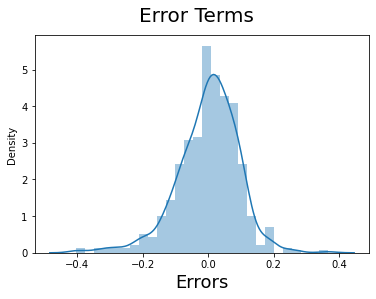

In [58]:
# Plot the histogram of the error terms
residual = y_train - y_train_pred
fig = plt.figure()
sns.distplot(residual)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [59]:
residual.index

Int64Index([653, 576, 426, 728, 482, 111, 580, 500, 479, 472,
            ...
            570, 316, 228, 655, 280, 526, 578,  53, 350,  79],
           dtype='int64', length=510)

# STEP 10 Making Predictions 

In [60]:
cols = X_train_rfe4.columns
cols

df_test[cols] = scaler.fit_transform(df_test[cols])
df_test.head()


X_test = df_test[cols]
X_test_new = sm.add_constant(X_test)


In [61]:
y_test_pred = lr_7.predict(X_test_new)


In [62]:
y_test = df_test.pop('cnt')

# STEP 11 Model Evaluation 

Text(0, 0.5, 'y_pred')

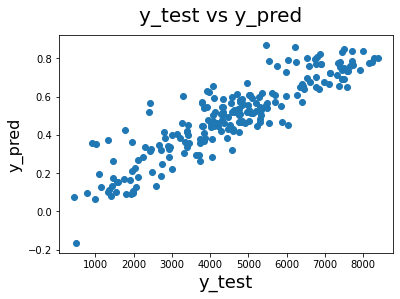

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.plot()
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

# Performing the Durbin-Watson Test

In [64]:
from statsmodels.stats.stattools import durbin_watson
print('Check for no autocorrelation','\n')


durbinWatson = durbin_watson(residual)
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

Check for no autocorrelation 

Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9862469204947875
Little to no autocorrelation 

Assumption satisfied


## Testing for Homoscedasticity

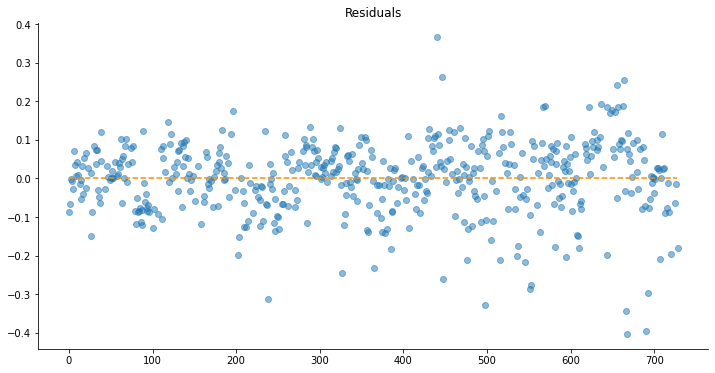

In [65]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=residual.index, y=residual, alpha=0.5)
plt.plot(np.repeat(0, residual.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show() 